### 알고리즘 구분용 용어
- ensembel
- bagging
- boosting

#### ensembel(앙상블)
- 음악에서 연주할 때 합창, 협주를 의미
- 정형 데이터(structured data)를 다루는 데 있어서 가장 뛰어난 성과를 내는 알고리즘
- 혼자서 학습하지 않고 여럿이서 학습한 다음 종합하여 결과를 냄
- 대부분 Decision Tree 기반으로 만들어진다
- 최종적으로 예측값을 도출할 때, n개의 알고리즘 결과값을 이용하는 방법이다
- 회귀문제 : n개의 알고리즘 결과값(숫자)들을 평균
- 분류문제 : n개의 알고리즘 결과값(경우의 수)들을 투표
- 대표적인 알고리즘: RandomForest, Extra Trees, Gradient Boosting

#### Bagging(베깅)
- 앙상블 기법의 일종이지만 시험에선 분리해서 나옴
- bag(bootstrap aggregation) + ing
- bootstrap에서 도출한 여러 개의 결과를 합산함

##### Bootstrap
- 데이터의 row를 무작위로 (복원)추출, 중복된 row를 허용함 새로운 데이터 셋 생성
- 동일한 데이터와 알고리즘으로 학습하면 -> 항상 결과가 같을 것이다
- bootstrap을 이용하면 새로운 데이터 셋을 만들 때마다 row의 구성이 다르다.-> bootstrap으로 조금씩 다른 데이터 셋을 n개 만들고, n개의 데이터셋에 대해 학습하고 n개의 예측값을 합산함
- Random Forest는 대표적인 Bagging 알고리즘

#### Boosting
- 이전 모델의 오차를 보완하는 방식으로 만들어짐
- 오답을 이용해 점수 상승을 도모, 오답을 새로운 정보로 이용하는 접근법
- 첫 번째 알고리즘으로 학습하고 예측하여 오답노트를 만듦 -> 오답노트의 문제를 학습대상 데이터 셋에 추가해서 새로운 데이터 셋을 생성 -> 두번째 알고리즘으로 새로운 데이터셋에 대해 학습하고 예측 -> 오차가 최소화 될때까지 반복
- 첫 번째 알고리즘으로 학습하여 예측하여 못 맞춘 정도(오차) 정보 획득 -> 오차 정보를 두 번째 알고리즘의 label로 사용(n번째 알고리즘은 n-1번째 알고리즘의 오차를 label 학습) -> 첫번째 알고리즘이 얼마나 틀렸는지 두번째 알고리즘이 학습하는 개념
- 정형 데이터 기준으로 가장 정확도가 좊은 알고리즘, **잘 사용했을 때**

##### Boosting 계열의 단점
- 속도가 느림(내부 계산이 많음)
- 과적합이 쉽게 발생함
- 대충 사용하면 RandomForest보다 성능이 안좋다
- 이전 오답을 새로운 정보로 접근하기 때문에 병렬 처리가 불가함

#### GBDT(Gradient Boosted Decision Tree)
- Decision Tree를 사용해 이전 트리의 오차를 보완하는 방식으로 경사하강법을 사용해 ensemble하는 방법
- XGBoost, CatBoost, LightGBM
- XGBoost : Boosting의 문제점을 보완하여 병렬 처리가 어느정도는 가능하게 함(속도가 계선됨)

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("test2_modifyed.csv")

In [9]:
df.head(5).T

,0,1,2,3,4
IsCanceled,0,0,0,0,1
LeadTime,342,737,0,9,85
ArrivalDateYear,2015,2015,2015,2015,2015
ArrivalDateMonth,July,July,July,July,July
ArrivalDateWeekNumber,27,27,27,27,27
ArrivalDateDayOfMonth,1,1,1,1,1
StaysInWeekendNights,0,0,0,0,0
StaysInWeekNights,0,0,2,2,3
Adults,2,2,2,2,2
Children,0,0,0,0,0


In [10]:
features = ['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'day_stay',
       'foreigner', 'proportion', 'car_yes', 'RA_changed']

label = 'IsCanceled'

In [11]:
train, test = df[0::2], df[1::2]
train, test = train.reset_index(), test.reset_index()

x_train, y_train = train[features], train[label]
x_test, y_test = test[features], test[label]

In [12]:
from sklearn.tree import DecisionTreeClassifier as dt

In [13]:
model = dt(max_depth=5)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [14]:
for_plot = pd.DataFrame()
for_plot['predict'] = model.predict(x_test)
for_plot['actual'] = y_test
for_plot.head(5)

,predict,actual
0,0,0
1,0,0
2,1,1
3,1,0
4,1,0


<img src='confusion matrix.png' width='600'/>


#### 분류문제 평가지표
##### Accuracy(정확도)
- 전체 중에 맞춘 비율
- acc = (TP + TN) / (TP + TN + FN + FP)

##### Precision(정밀도)
- 모델이 True라고 맞게 분류한 것 중에서 실제로 True인 것의 비율
- prec = TP / (TP + FP)
- 날씨 예측 모델이 맑다고 예측, 실제 날씨가 맑았는지를 살펴보는 지표
- 모델의 입장에서 살펴봄


##### recall(재현율)
- 실제 True인 것 중에서 모델이 True라고 맞게 예측한 것의 비율
- recall = TP / (TP + FN)
- 실제 날씨가 맑은 날 중에서 모델이 맑다고 예측한 비율을 나타낸 지표
- 정답적인 측면에서 살펴봄

##### fall-out(False Positive Rate)
- 실제 False인 데이터 중에서 모델이 True라고 예축한 비율
- FPR = FP / (FP + TN)

##### Specificity(특이도)
- 실제 False인 데이터 중에서 모델이 False라고 예측한 비율
- spec = TN / (TN + FP)
- TNR(True Negative Rate)

##### F1-Score
- 정밀도와 재현율을 결합한 지표
- 정밀도와 재현율의 차이가 없을 때 높은 값을 가짐
- F1 = (2 * recall * spec) / (recall + precision)

#### precision과 recall은 언제 고려될까?
- class imbalance issue: 경우의 수가 한쪽으로 치우쳐진 경우

#### precision과 recall의 차이점
- 화재경보(불이 난경우:1, 안난경우: 0)
- FP : 불이 난줄 알았는데 안남
- FN : 불이 안 난줄 알았는데 불이 남
- 경중의 차이가 큼(FP는 괜찮지만 FN은 잣됨)

- 스팸메일 분류(스팸의 경우:1, 아닌경우:0)
- FP: 스팸메일인줄 알았는데 아니었음(정상메일 어디감)
- 환자검진(병에 걸린경우:1, 아닌경우:0)
- FN : 건강한줄 알았는데 아니었음
- 금융사기탐지(사기인경우:1)
- FN : 사기 아닌줄 알았는데 사기었음
- 게임 어뷰저분류(어뷰저인경우:1)
- FN : 어뷰저인줄 알았는데 아니었음

In [18]:
from sklearn.metrics import confusion_matrix as cm

In [19]:
TN, FP, FN, TP = cm(for_plot['actual'], for_plot['predict']).ravel()
print(TN, FP, FN, TP)

13424 849 2490 3035


In [20]:
acc = (TP + TN) / (TP + TN + FN + FP)
prec = TP / (TP + FP)
recall = TP / (TP + FN)
print('accuracy:', acc)
print('precision:', prec)
print('recall:', recall)


accuracy: 0.831346600666734
precision: 0.7814109165808445
recall: 0.5493212669683258


In [21]:
FPR = FP / (FP + TN)
FPR

0.059482939816436625

#### ROC_Curve
- Receiver Operation Characteristic Curve
- 여러 임계값들을 기준으로 recall - fallout의 변화를 시각적으로 표현한 것
- 성능비교용
- 분류 모형 성능을 시각화하여 상호비교용
- FPR가 변할때 TPR가 어떻게 변하는지 나타내는 곡선
- FPR = 1 - 특이도
- TPR = recall
- 곡선 아래의 면적 : AUC (Area Under Curve)
- AUC가 가장 큰 모델이 가장 이상적인 모델이다.


#### AUC
- ROC의 밑 면적이 1에 가까울 수록(왼쪽 상단에 꼭지점에 다가갈 수록) 좋은 성능을 나타냄


In [24]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import GradientBoostingClassifier as gb

In [25]:
m1, m2, m3 = dt(), rf(), gb()
m1.fit(x_train, y_train)
m2.fit(x_train, y_train)
m3.fit(x_train, y_train)


GradientBoostingClassifier()

In [26]:
m2.predict_proba(x_test) # 각각의 결과에 대한 확률을 보여줌 확신의 정도

array([[0.84 , 0.16 ],
       [0.68 , 0.32 ],
       [0.378, 0.622],
       ...,
       [1.   , 0.   ],
       [0.89 , 0.11 ],
       [0.75 , 0.25 ]])

In [27]:
m1.predict_proba(x_test) # 과적합 확률이 있다.

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [28]:
m3.predict_proba(x_test)

array([[0.49424395, 0.50575605],
       [0.81679639, 0.18320361],
       [0.28839572, 0.71160428],
       ...,
       [0.55178991, 0.44821009],
       [0.55178991, 0.44821009],
       [0.63374509, 0.36625491]])

In [72]:
t1 = pd.DataFrame(m1.predict_proba(x_test), columns=['neg', 'pos'])
t2 = pd.DataFrame(m2.predict_proba(x_test), columns=['neg', 'pos'])
t3 = pd.DataFrame(m3.predict_proba(x_test), columns=['neg', 'pos'])

t1['actual'] = for_plot['actual']
t1['predict'] = for_plot['predict']
t2['actual'] = for_plot['actual']
t2['predict'] = for_plot['predict']
t3['actual'] = for_plot['actual']
t3['predict'] = for_plot['predict']

In [30]:
t3.head(10)

,neg,pos
0,0.494244,0.505756
1,0.816796,0.183204
2,0.288396,0.711604
3,0.370010,0.629990
4,0.361432,0.638568
5,0.516763,0.483237
6,0.947800,0.052200
7,0.228134,0.771866
8,0.423145,0.576855
9,0.536212,0.463788


In [31]:
from sklearn.metrics import roc_curve

In [32]:
x1, y1, _ = roc_curve(y_test, t1['pos'])
x2, y2, _ = roc_curve(y_test, t2['pos'])
x3, y3, _ = roc_curve(y_test, t3['pos'])
print(x1)
print(y1)

[0.         0.1099979  0.11020809 0.11041827 0.11048833 0.11202971
 0.11245008 0.11273033 0.11399145 0.11413158 0.11448189 1.        ]
[0.         0.75547511 0.7558371  0.75638009 0.75692308 0.759819
 0.759819   0.76       0.76072398 0.76090498 0.76144796 1.        ]


In [33]:
import matplotlib.pylab as plt

Text(0, 0.5, 'recall(TPR)')

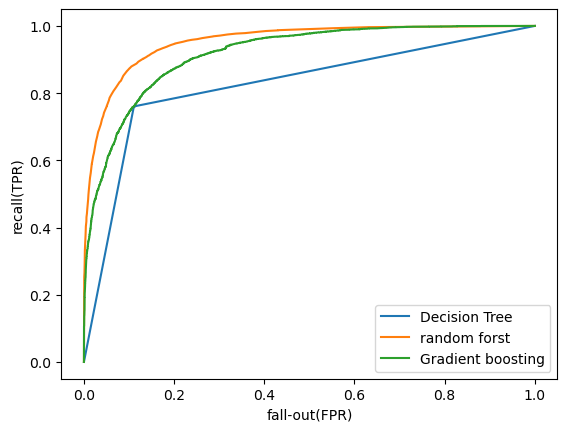

In [66]:
plt.plot(x1, y1, label="Decision Tree")
plt.plot(x2, y2, label="random forst")
plt.plot(x3, y3, label="Gradient boosting")
plt.legend()
plt.xlabel('fall-out(FPR)')
plt.ylabel('recall(TPR)')

#### ROC_Curve는 어떻게 그려지는 걸까?
- 확신의 정도와 실제 정답을 이용해 y축 : recall x축: fall-out
- recall : 실제 T인 것중에서 맞춘 비율
- fall-out : 실제 F것 중 맞춘 비율
- 전부 T라면 recall: 1, fall-out: 1
- 전부 F라면 recall: 0, fall-out: 0

- 판단 기준을 0~100까지 조금씩 바꾸면서 그때마다 CM 획득
- cm으로부터 평가지표 값 산출
- 판단 기준을 0, 10, 20, ....., 100 으로 총 11번 다르게 하면 cm도 11개가 나옴
- 좌표 평면에 11개의 점을 찍을 수 있음 -> 이 점을 이어 그리면 ROC_curve가 완성됨

In [70]:
for_plot.loc[for_plot['actual'] == 1]

,predict,actual
2,1,1
8,1,1
9,1,1
10,1,1
14,0,1
...,...,...
19732,0,1
19733,0,1
19734,0,1
19738,0,1


In [76]:
threshold = 0.1 # default = 0.5
t2['predict'] = 0
t2.loc[t2['pos'] > threshold, 'predict'] = 1

In [78]:
t2

,neg,pos,actual,predict
0,0.840,0.160,0,1
1,0.680,0.320,0,1
2,0.378,0.622,1,1
3,0.460,0.540,0,1
4,0.570,0.430,0,1
...,...,...,...,...
19793,0.930,0.070,0,0
19794,0.930,0.070,0,0
19795,1.000,0.000,0,0
19796,0.890,0.110,0,1


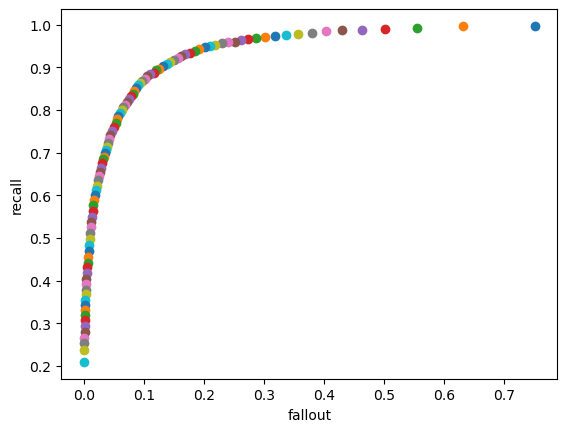

In [96]:
t2['actual'] = y_test
threshold = 0.1

t2['predict'] = 0
t2.loc[t2['pos'] > threshold, 'predict'] = 1

TN, FP, FN, TP = cm(t2['actual'], t2['predict']).ravel()

recall = TP / (TP + FN)
fall = FP / (FP + TN)

plt.xlabel('fallout')
plt.ylabel('recall')

for i in range(100):
    threshold = i * 0.01
    t2['predict'] = 0
    t2.loc[t2['pos'] > threshold, 'predict'] = 1
    
    TN, FP, FN, TP = cm(t2['actual'], t2['predict']).ravel()

    recall = TP / (TP + FN)
    fall = FP / (FP + TN)
    plt.scatter(fall, recall)


#### hyperparamemeter-Tuning(초매개변수 조정)
- hyperparamter: 모델이 학습할 수 없어서 사용자가 지정해야만 하는 parameter
- 알고리즘의 옵션을 조정해 성능을 극대화시키는 방법
- 최적의 옵션값을 찾아 알고리즘 성능을 극대화하자

In [101]:
model = rf()
model.fit(x_train, y_train)

for_plot = pd.DataFrame()
for_plot['predict'] = model.predict(x_test)
for_plot['actual'] = y_train

TN, FP, FN, TP = cm(for_plot['actual'], for_plot['predict']).ravel()

recall = TP / (TP + FN)
fall = FP / (FP + TN)

print(recall)

0.743335734870317


In [103]:
model = rf(max_depth=10, max_features=0.9)
model.fit(x_train, y_train)

for_plot = pd.DataFrame()
for_plot['predict'] = model.predict(x_test)
for_plot['actual'] = y_train

TN, FP, FN, TP = cm(for_plot['actual'], for_plot['predict']).ravel()

recall = TP / (TP + FN)
fall = FP / (FP + TN)

print(recall)

# 옵션 값이 달라지면 평가지표 수치가 조금씩 달라짐
# 하이퍼 파라미터가 조합되었을때 최적값을 찾는 것이지 하나씩 찾으면 소용이 없다.


0.6698487031700289


In [105]:
def scorer(model):
    model.fit(x_train, y_train)

    for_plot = pd.DataFrame()
    for_plot['predict'] = model.predict(x_test)
    for_plot['actual'] = y_train
    
    TN, FP, FN, TP = cm(for_plot['actual'], for_plot['predict']).ravel()
    
    recall = TP / (TP + FN)
    fall = FP / (FP + TN)
    
    return recall

In [125]:
model = rf(max_depth=20, max_features=0.5)
print(scorer(model))

0.7588256484149856


### hyperparameter tuning 접근법
- grid-search
- random-search
- optimizer

#### grid-search
- 장점 : 거의 모든 영역을 찾을 수 있다.
- 단점 : 거의 모든 조합을 시도하기 때문에 시간이 오래걸린다.(언제 끝날지 모름 -> 옵션 값에 따라서 학습속도가 달라질 수 있다.)

#### random-search
- 무작위 조합으로 찾아나가는 방식
- 장점 : 쌩 랜덤은 아니기 때문에 시간을 조율할 수 있다.
- 정한 시간 동안에 조합을 무작위로 만들어 찾아나감
- 처음에는 넓은 영역을 대항으로 찾고, 이후에는 찾는 범위를 점차 줄여나감
- 단점 : 최적의 조합을 찾는데 걸리는 시간이 부족할 수 있음


In [148]:
md_ls = [20,25,30,35,40,45,50,55]
mf_ls = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
all_score = []

for md in md_ls :
    for mf in mf_ls :
        model = rf(max_depth=md, max_features=mf, n_jobs=-1)
        all_score.append({'recall':scorer(model), 'md':md, 'mf':mf})

hyper_df = pd.DataFrame(all_score)

In [220]:
hyper_df.sort_values(by='recall', ascending=False).loc[hyper_df['recall'] > 0.75].head(5)

,recall,md,mf
5,0.761888,20,0.6
14,0.760627,25,0.5
6,0.759366,20,0.7
17,0.759366,25,0.8
15,0.759186,25,0.6


In [154]:
import random as r
import time as t
import threading as th

In [ ]:
sec = 60
end_time = t.time() + sec

all_recall_ls = []

end_trigger = True
while end_trigger:
    md = r.randint(20,50)
    mf = r.randint(1,999) / 1000
    model = rf(max_depth=md, max_features=mf, n_jobs=-1)
    all_score.append({'recall':scorer(model), 'md':md, 'mf':mf})
    
    if t.time() > end_time:
        end_trigger = False


rhyper_df = pd.DataFrame(all_score)
rhyper_df.sort_values(by='recall', ascending=False).loc[rhyper_df['recall'] > 0.77]

In [226]:
rhyper_df

,recall,md,mf
0,0.701549,20,0.100
1,0.735231,20,0.200
2,0.749640,20,0.300
3,0.757565,20,0.400
4,0.758105,20,0.500
...,...,...,...
1316,0.739914,25,0.146
1317,0.756124,24,0.642
1318,0.740094,33,0.171
1319,0.752882,28,0.316
